# Breaking Down the Panama Papers


by Wilson Leong

# Introduction to the Panama Papers

About two months ago an anonymous whistleblower leaked over 2 Terrabytes worth of data that contained information on the countries the world's wealthiest and/or most influential people hid their assets in. Not only did the Panama Papers provide information on which countries were involved, but also the middle-men involved in helping clients preserve their wealth. In addition to providing information on the middlemen, the Panama Papers included the status of each offshore entity, the country the owners of the assets originally came from, and who helped create the offshore entity. Mossack Fonseca & Co., a Panamanian law firm, is one of the major offshore service providers that built and facilitated numerous offshore entities. Lastly, the Panama Papers, for some reason, contained data from the offshore leaks database. The offshore leaks happened about 3 years ago. 

In this project, I first focused on the countries, people and organization that have been very involved with the business of offshore wealth storage. In Part 2, I will be sharing the discoveries I made in the Panama Papers database regarding the offshore entity owners' and shareholders' efforts to conceal their true identities.

In [1]:
import pandas as pd
# https://offshoreleaks.icij.org/pages/about#terms_definition
#each nodeID is an unqiue identifier for information

addresses_data = pd.read_csv("/data/panama/Addresses.csv")
addresses_col_list = addresses_data.columns

#Index(['address', 'icij_id', 'valid_until', 'country_codes', 'countries',
#      'node_id', 'sourceID'],
#    dtype='object')

#sourceid: where the information is from (i.e. panama papers or offshore leaks database)

all_edges_data = pd.read_csv("/data/panama/all_edges.csv")
edges_col_list = all_edges_data.columns

# Index(['node_1', 'rel_type', 'node_2'], dtype='object')

# this data set: node1 = ??? Shareholder of, intermediary of, beneficiary of, Secretary of, Trust Settlor of, Nominated Person of,
# Beneficial Owner of, Co-Trustee of Trust of, registered address, Authorised Person / Signatory of, President of,
#  Director of, Protector of,  ...node2(entity)

# Intermediary:
# A go-between for someone seeking an offshore corporation and an offshore service provider
# -- usually a law-firm or a middleman that asks an offshore service provider to create an offshore firm for a client.

entities_data = pd.read_csv("/data/panama/Entities.csv")
entities_col_list = entities_data.columns

# Index(['name', 'original_name', 'former_name', 'jurisdiction',
#        'jurisdiction_description', 'company_type', 'address', 'internal_id',
#        'incorporation_date', 'inactivation_date', 'struck_off_date',
#        'dorm_date', 'status', 'service_provider', 'ibcRUC', 'country_codes',
#        'countries', 'note', 'valid_until', 'node_id', 'sourceID'],
#       dtype='object')

intermediaries_data = pd.read_csv("/data/panama/Intermediaries.csv")
intermediaries_col_list = intermediaries_data.columns

# Index(['name', 'internal_id', 'address', 'valid_until', 'country_codes',
#        'countries', 'status', 'node_id', 'sourceID'],
#       dtype='object')

officers_data = pd.read_csv("/data/panama/Officers.csv")
officers_col_list = officers_data.columns

# Index(['name', 'icij_id', 'valid_until', 'country_codes', 'countries',
#        'node_id', 'sourceID'],
#       dtype='object')

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,2,5,9,10,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

#addresses_data
#all_edges_data
entities_data
#intermediaries_data
#officers_data


#.merge(entities_data, on = 'node_id').merge(intermediaries_data, on = 'node_id')
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt

# map = Basemap()

# map.drawcoastlines()

,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers
3,"SKY-BLUE GIFTS & TOYS CO., LTD.","SKY-BLUE GIFTS & TOYS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000914.0,06-JAN-2006,16-FEB-2009,...,NaN,Defaulted,Mossack Fonseca,24012,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000004,Panama Papers
4,FORTUNEMAKER INVESTMENTS CORPORATION,FORTUNEMAKER INVESTMENTS CORPORATION,NaN,SAM,Samoa,NaN,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,1001266.0,19-APR-2006,15-MAY-2009,...,NaN,Changed agent,Mossack Fonseca,R25638,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000005,Panama Papers
5,8808 HOLDING LIMITED,8808 HOLDING LIMITED (EX-DIAMOND LIMITED),DIAMOND LIMITED,SAM,Samoa,NaN,TWC MANAGEMENT LIMITED SUITE D; 19/F RITZ PLAZ...,1000916.0,05-JAN-2006,NaN,...,NaN,Active,Mossack Fonseca,23835,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000006,Panama Papers
6,KENT DEVELOPMENT LIMITED,KENT DEVELOPMENT LIMITED,NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000022.0,26-JAN-2004,03-MAY-2006,...,NaN,Defaulted,Mossack Fonseca,15757,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000007,Panama Papers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319143,LLB Accounting Services Ltd,NaN,NaN,XXX,Undetermined,Sundry Account,"LL. B. Accounting Services Limited 21/F., Suns...",NaN,NaN,NaN,...,NaN,NaN,Commonwealth Trust Limited,NaN,HKG;XXX,Hong Kong;Not identified,This is not an offshore entity even though it ...,The Offshore Leaks data is current through 2010,233389,Offshore Leaks
319144,Walker Smiths,NaN,NaN,XXX,Undetermined,NaN,NaN,NaN,01-JAN-1980,NaN,...,NaN,NaN,Commonwealth Trust Limited,NaN,XXX,Not identified,NaN,The Offshore Leaks data is current through 2010,233393,Offshore Leaks


# Part 1: Key Players Involved in the Transfer of Offshore Assets

# Definitions:

offshore entity: A company, trust or fund created in a low-tax, offshore jurisdiction by an agent.

intermediary: A middleman or a firm to go to in order to request an offshore wealth storage service provider.

Officer: A person or company who plays a role in an offshore entity.

The top 3-5 cities/countries/locations/jurisdictions that are most popular destinartions 
for offshore entities are located in:

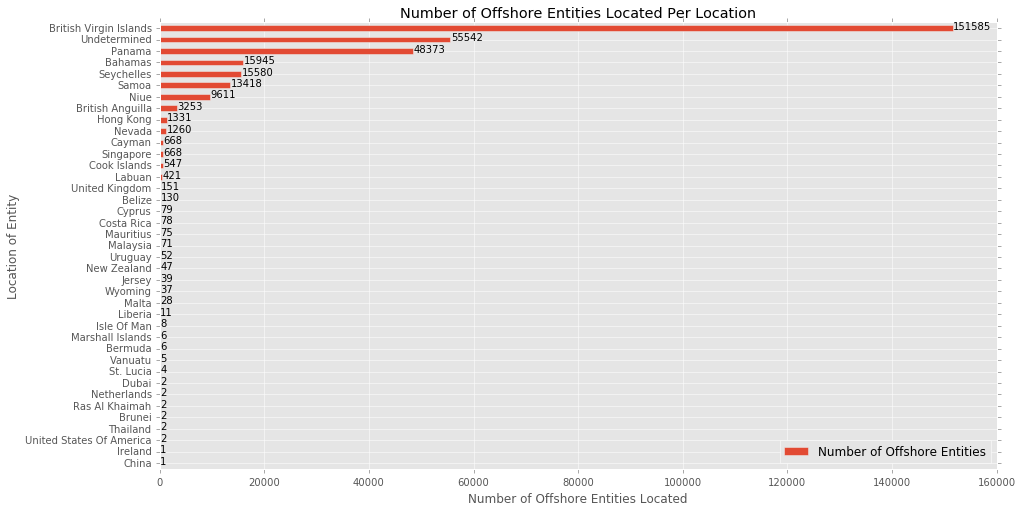

In [3]:
entities_data_most_pop_dest_for_entities = entities_data.groupby('jurisdiction_description')['name'].count().sort_values().drop('Recorded in leaked files as "fund"' )

entities_data_most_pop_dest_for_entities

# entities_data_most_pop_dest_for_entities = entities_data_most_pop_dest_for_entities.sort_values(by = 'name') # by = 'name'
# entities_data_most_pop_dest_for_entities = entities_data_most_pop_dest_for_entities.drop('Recorded in leaked files as "fund"' )
# #There were a lot of undertermined client's country of origin

plt.figure()

entities_per_counttry_barh = entities_data_most_pop_dest_for_entities.plot.barh(figsize = (15,8))#figsize = (15,8)
plt.ylabel('Location of Entity')
plt.xlabel('Number of Offshore Entities Located')
plt.legend(['Number of Offshore Entities'], loc = 4)
plt.title("Number of Offshore Entities Located Per Location")


# Show entity count on bargraph
for rect, label in zip(entities_per_counttry_barh.patches, entities_data_most_pop_dest_for_entities):
    width = rect.get_width() # get distance of width of bar
    entities_per_counttry_barh.text(rect.get_width() + 100, rect.get_y(), label, va='bottom')


British Virgin Islands, Panama, Bahamas, Seychelles, and the Samoa are the top 5 jurisdictions in which offshore entities are located. It was surprising that Samoa and Seychelles were included in the top 5 because other jurisdictions have a reputation of being tax-havens (i.e. Hong Kong, Cayman Islands, Singapore, etc.), as far I know.

The top 3-5 countries/cities where the most amount of clients (including duplicates) requested to transfer individual assets to an offshore entity:

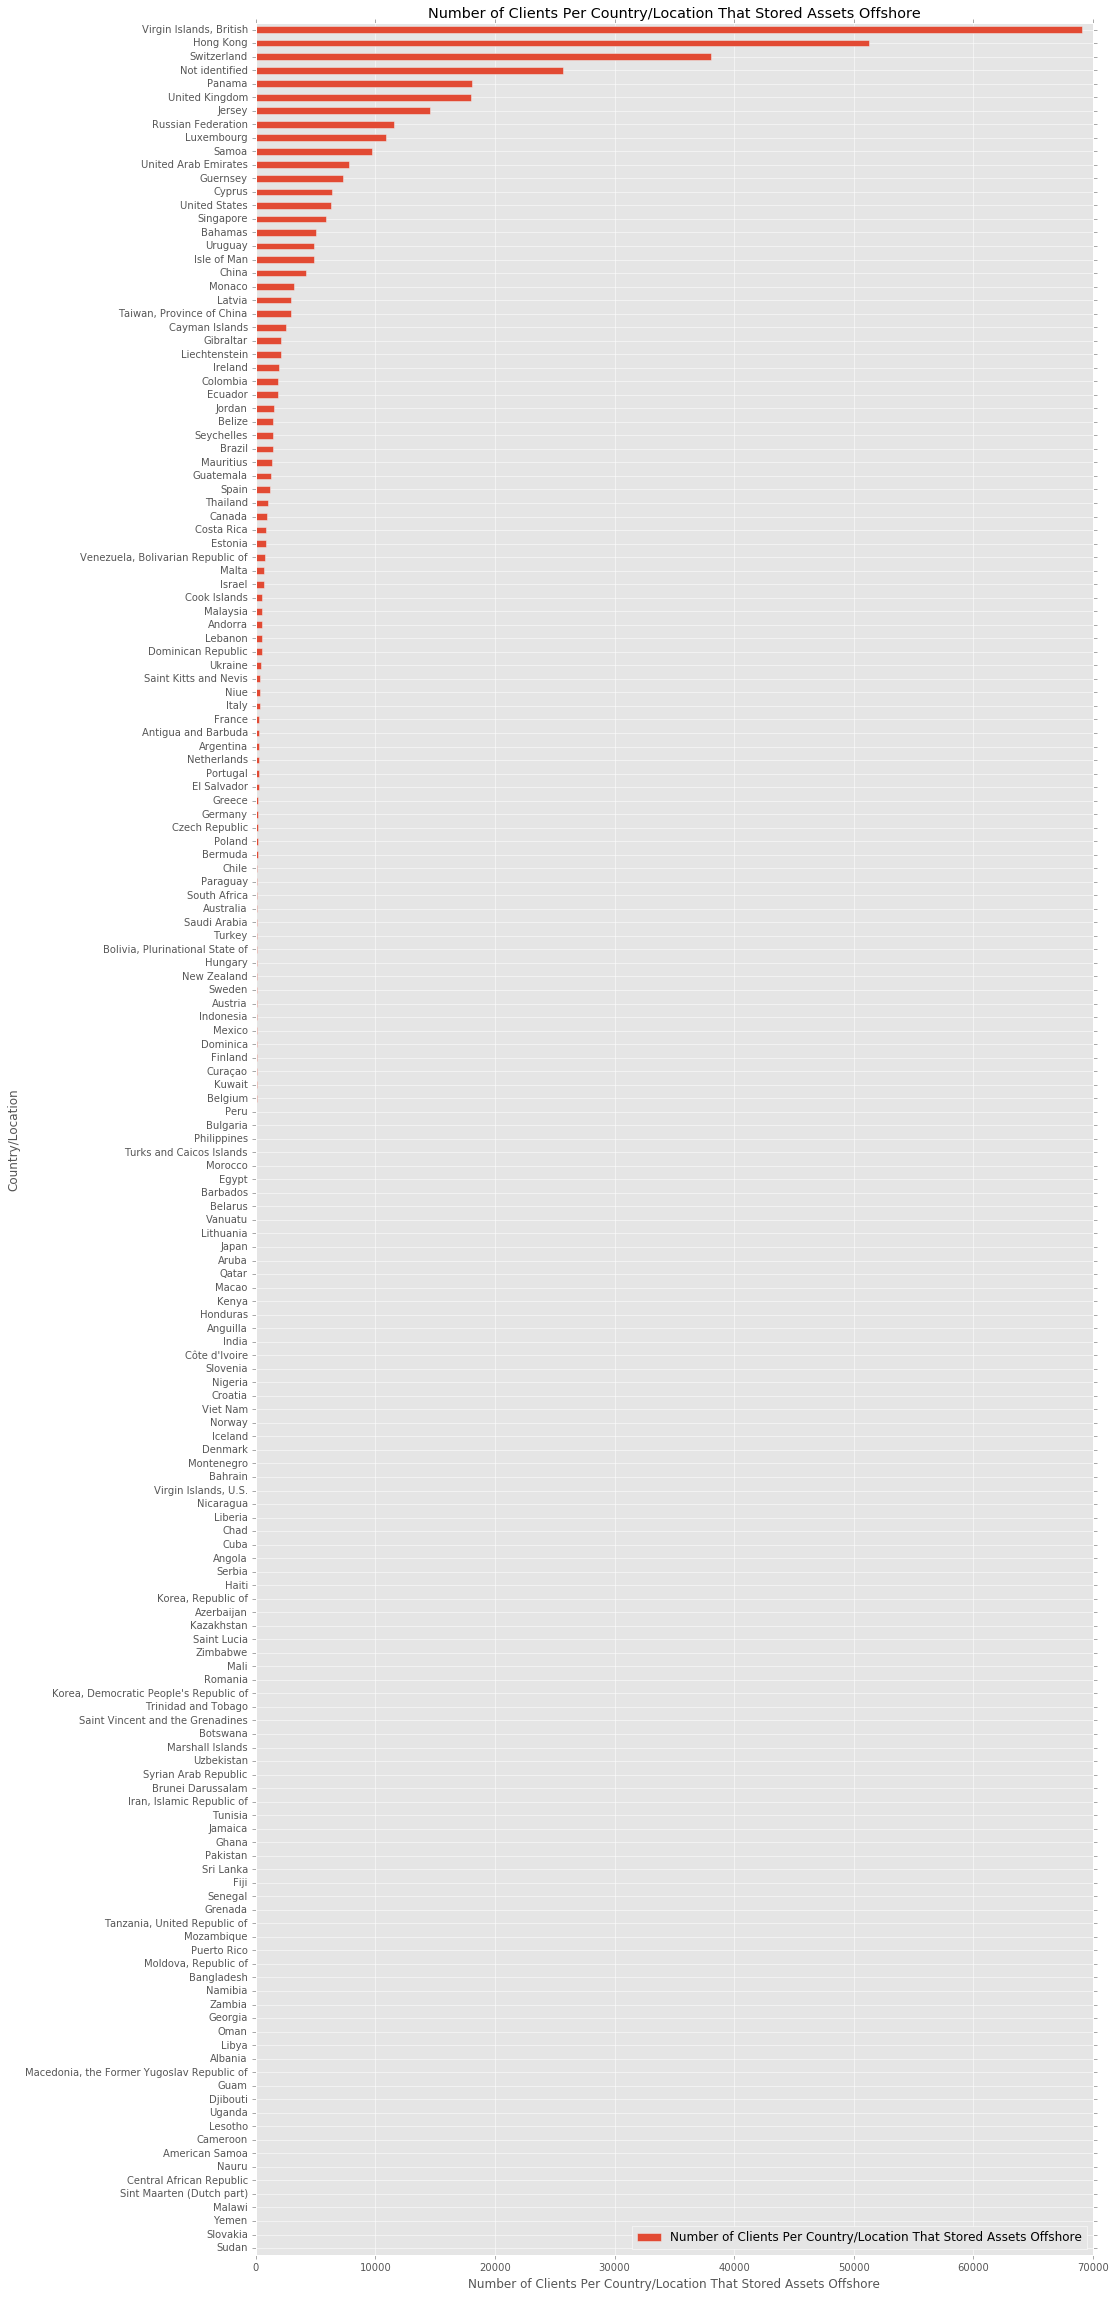

In [4]:
# for index, row in df.iterrows():
#     print row['c1'], row['c2']


#entities_data.columns[16]
# string1 = entities_data.ix[0,16]
# string1 += "; second"
# string1.split('; ')
#error when i = 227 or 228 cell when countries is empty

entities_data_countries_only = entities_data['countries'].to_frame().dropna()
#entities_data_countries_only.ix[227,:]

countries_clients_of_origin_dict = {}

for row in entities_data_countries_only.itertuples():
    
    if  (row != None):
        currCountryList = row[0+ 1].split(";")
        #print(currCountryList )
        for country in currCountryList:
            if country not in countries_clients_of_origin_dict:
                countries_clients_of_origin_dict[country] = 1
            else:
                countries_clients_of_origin_dict[country]+= 1
   
countries_clients_of_origin_df = pd.DataFrame.from_dict(countries_clients_of_origin_dict, orient = 'index')  
countries_clients_of_origin_df.rename(columns = {0:'Number of Clients Per Country/Location That Stored Assets Offshore'}, inplace = True)
countries_clients_of_origin_df['Countries/Locations'] = countries_clients_of_origin_df.index
countries_clients_of_origin_df = countries_clients_of_origin_df.sort_values(by = 'Number of Clients Per Country/Location That Stored Assets Offshore',ascending = True)

plt.figure()

countries_clients_of_origin_barh = countries_clients_of_origin_df.plot.barh(x = 'Countries/Locations', \
        y = 'Number of Clients Per Country/Location That Stored Assets Offshore' ,figsize=(15,40) )

plt.ylabel('Country/Location')
plt.xlabel('Number of Clients Per Country/Location That Stored Assets Offshore')
plt.legend(['Number of Clients Per Country/Location That Stored Assets Offshore'], loc = 4)
plt.title('Number of Clients Per Country/Location That Stored Assets Offshore')

# # Show entity count on bargraph
# for rect, label in zip(countries_clients_of_origin_barh.patches, countries_clients_of_origin_df):
#     width = rect.get_width() # get distance of width of bar
#     countries_clients_of_origin_barh.text(rect.get_width() + 10, rect.get_y(), label, va='bottom')

The British Virgin Islands, Hong Kong, and Switzerland are three countries/locations where the most number of people store their individual assets offshore.

Which officer owned the most entities ? It can also be a company, not just a person.

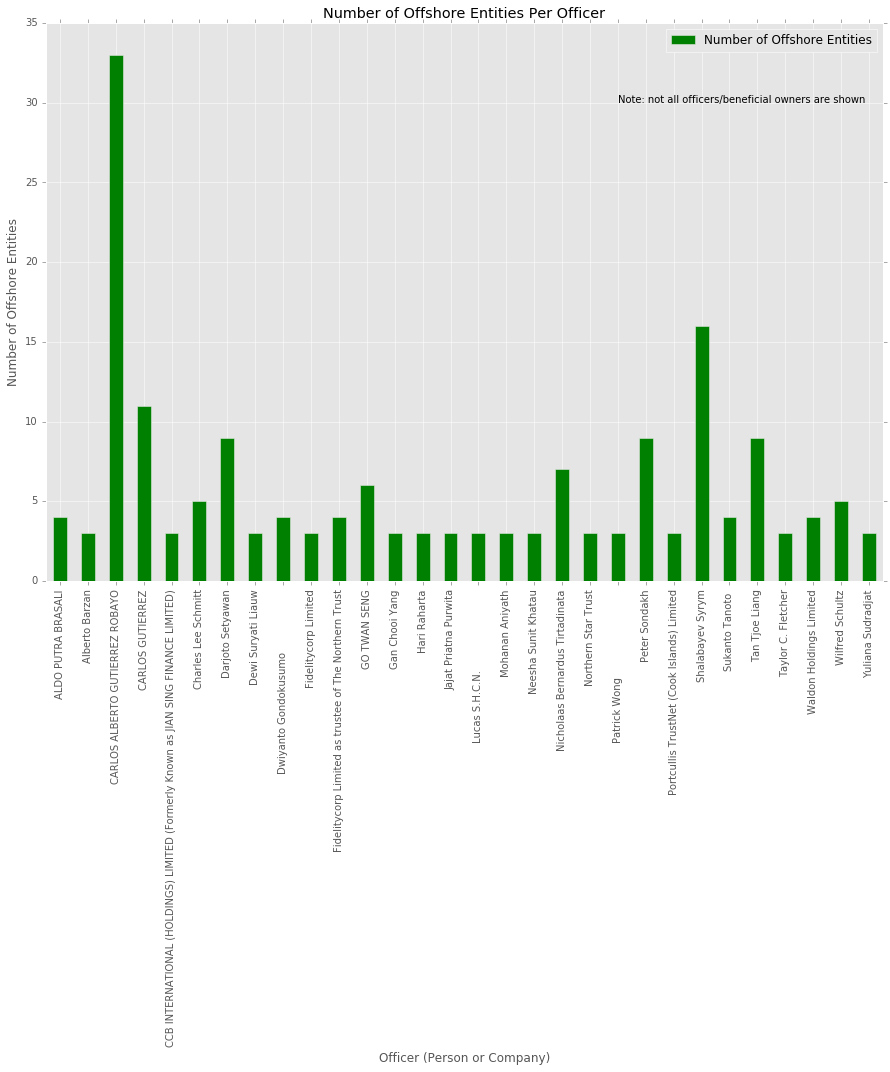

In [5]:
beneficiary_owners = all_edges_data.ix[all_edges_data['rel_type'] == 'Beneficial Owner of',:] #filter by beneficiary owners only
#beneficiary_owners['node_1'].duplicated().unique() #check whether or not there are people (officers) that own multiple entities

beneficiary_owners_duplicate_checks_df = beneficiary_owners['node_1'].duplicated().to_frame()
beneficiary_owners_duplicate_checks_df = beneficiary_owners_duplicate_checks_df.ix[beneficiary_owners_duplicate_checks_df['node_1'] == True, :]
#dataframe with only want rows with officers that own multiple entities elsewhere
beneficiary_owners_duplicate_checks_df

beneficiary_owners_withmult_entities = beneficiary_owners.join(beneficiary_owners_duplicate_checks_df, rsuffix  = 'Has Multiple Entities')
#join on rows (beneficiary owners/officers) that have multiple entities
beneficiary_owners_withmult_entities.rename(columns={'node_1Has Multiple Entities':'Beneficiary Owner Has Multiple Entities'}, inplace=True)
beneficiary_owners_withmult_entities.rename(columns = {'node_1': 'node_id'},inplace = True) #rename node_1 for merging with officers data

beneficiary_owners_withmult_entities_and_names = beneficiary_owners_withmult_entities.merge(officers_data, on = 'node_id')
beneficiary_owners_withmult_entities_and_names = beneficiary_owners_withmult_entities_and_names.ix[\
            beneficiary_owners_withmult_entities_and_names['Beneficiary Owner Has Multiple Entities'] == True]

# cannot just simply groupby name when you know there will be the same officer that owned multiple offshore entities
# names of officer can also be mispelled or spacing will be different
beneficiary_owners_by_numEntities = beneficiary_owners_withmult_entities_and_names.groupby('name')['node_id'].count().to_frame()
beneficiary_owners_by_numEntities.rename(columns = {'node_id':'Number of Offshore Entities'},inplace = True)

#filter dataframe even further to only get officers/owners that actually have more than several entities
beneficiary_owners_by_numEntities = beneficiary_owners_by_numEntities.ix[beneficiary_owners_by_numEntities['Number of Offshore Entities'] > 2,:]
beneficiary_owners_by_numEntities.describe() #to see what the range of number of entities is


plt.figure()

beneficiary_owners_by_numEntities_bar = beneficiary_owners_by_numEntities.plot.bar(figsize = (15,10), color = 'g')#figsize = (15,8)
plt.ylabel('Number of Offshore Entities')
plt.xlabel('Officer (Person or Company)')
plt.legend(['Number of Offshore Entities'], loc = 1)
plt.title("Number of Offshore Entities Per Officer")
plt.annotate("Note: not all officers/beneficial owners are shown", (20,30))


# # Show entity count on bargraph
# for rect, label in zip(beneficiary_owners_by_numEntities_bar.patches,beneficiary_owners_by_numEntities):
#     width = rect.get_width() # get distance of width of bar
#     beneficiary_owners_by_numEntities_bar.text(rect.get_width() + 100, rect.get_y(), label, va='bottom')



Carlos Roberto Gutierrez Robayo owned the most offshore entities/companies. It is not surprising that Robayo would have an incentive to own that many offshore entities because he has many businesses involving agriculture, real estate, construction, coal, oil and railways. Unfortunately, the Panama Papers did not contain any information on how many



a) Which interediaries (top 3?) (either law-firm or middleman)  have requested an agent to open an offshore entity the most number of times?

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


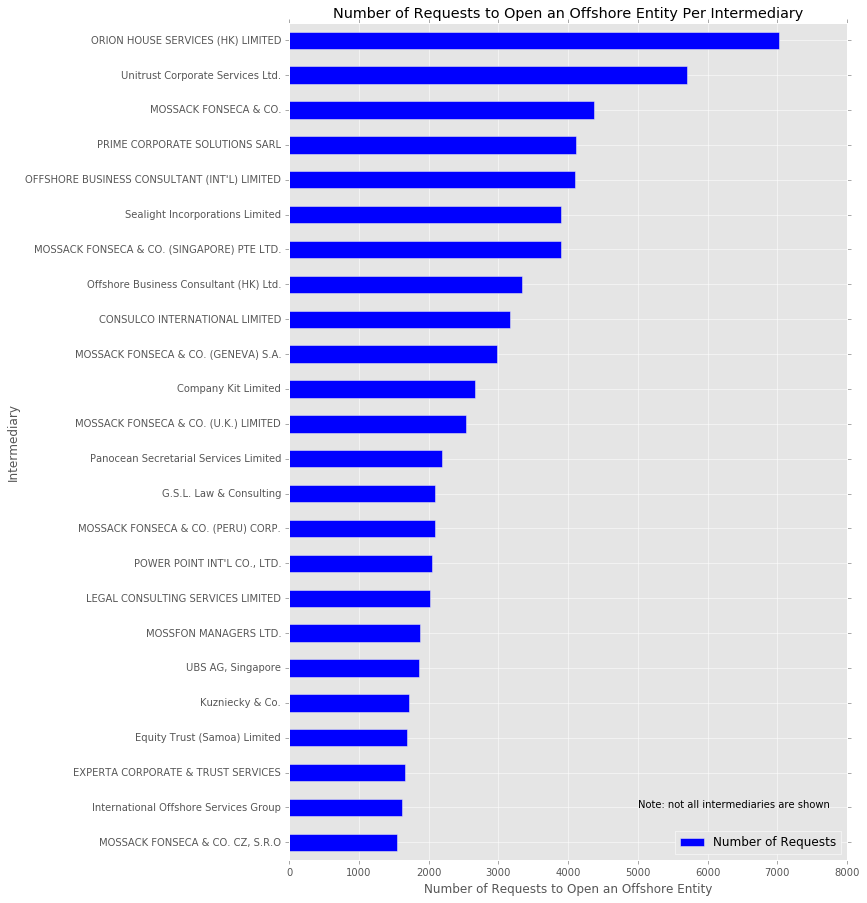

In [6]:
#node_2 in all edges correspond to node id in entities data; node_1 in all edges correspond to node_id in intermediaries
# it is possible that something/someone can be an intermediary
intermediaries_only_link = all_edges_data.ix[all_edges_data['rel_type'] == 'intermediary of',:]
intermediaries_only_link.rename(columns = {'node_1':'node_id'}, inplace = True)
intermediaries_only_main = intermediaries_only_link.merge(intermediaries_data, on = 'node_id') #match who is an intermediary of what
intermediaries_by_numRequests = intermediaries_only_main.groupby('name')['node_2'].count().to_frame().reset_index()
intermediaries_by_numRequests.rename(columns = {'name':'Intermediary','node_2':'Number Of Requests'}, inplace = True)
intermediaries_by_numRequests = intermediaries_by_numRequests.sort_values(by = 'Number Of Requests')

#filter for graphing purposes
intermediaries_by_numRequests = intermediaries_by_numRequests.ix[intermediaries_by_numRequests['Number Of Requests'] >= 1500,:]

plt.figure()

intermediaries_by_numRequests_barh = intermediaries_by_numRequests.plot.barh(x='Intermediary',y='Number Of Requests',figsize = (10,15), color = 'b')#figsize = (15,8)
plt.ylabel('Intermediary')
plt.xlabel('Number of Requests to Open an Offshore Entity')
plt.legend(['Number of Requests'], loc = 4)
plt.title("Number of Requests to Open an Offshore Entity Per Intermediary")
plt.annotate("Note: not all intermediaries are shown", (5000,1))



Orion House Services (Hong Kong), Unitrust Corporate Services (Canada), Mossack Fonseca & Co (Panama Branch[Headquarters]) are the three intermediaries that have received the most number of clients that wanted to open an offshore entity (trust).

However, Mossack Fonseca & Co had multiple branches in other countries that also had many clients. Thus, technically Mossack Fonseca is ultimately the most preferred intermediary. On top of being an intermediary, Mossack Fonseca also seemed to open offshore entities as well.

# Part 2: Phony Shareholders and Directors 

# Definitions:

nominee shareholder: Someone who claims to be a shareholder of an offshore company/entity.

bearer(Spanish: 'portador'): The true owner of an offshore company's shares

nominee director: Not the real owner of an offshore company/entity.


a) Number of shareholders (both nominee and bearer) per active entity:


In [7]:
shareholder_link = all_edges_data.ix[all_edges_data['rel_type'] == 'Shareholder of', :]
entities_active_only = entities_data.ix[entities_data['status'] == 'Active',:]
shareholder_link.rename(columns = {'node_2': 'node_id'}, inplace = True)

shareholder_merged_active = shareholder_link.merge(entities_active_only , on = 'node_id')

entity_by_shareholder = shareholder_merged_active.groupby('name')['node_1'].count().to_frame()
entity_by_shareholder.rename(columns = {'node_1': 'Number of shareholders'}, inplace = True)

entity_by_shareholder['name'] = entity_by_shareholder.index

entity_by_shareholder.sort_values(by = 'Number of shareholders', ascending = False)



# entity_by_shareholder.hist()

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Number of shareholders,name
name,,
WAN CHI INVESTMENTS LIMITED,447,WAN CHI INVESTMENTS LIMITED
HANNSPREE INC.,430,HANNSPREE INC.
M.J. Health Management International Holding Inc.,317,M.J. Health Management International Holding Inc.
Symtron Technology (Cayman) Inc.,108,Symtron Technology (Cayman) Inc.
A-Spine Holding Group Corp.,78,A-Spine Holding Group Corp.
Polynésienne de Pierres Précieuses 3P Société Anonyme,77,Polynésienne de Pierres Précieuses 3P Société ...
Keen High Technologies Limited,72,Keen High Technologies Limited
...,...,...
Home Valley Limited,1,Home Valley Limited


b)  Number of shareholders that are bearer/portador shareholders for each active entity.

In [8]:
#officers_data['name'].fillna("empty", downcast = 'infer').isnull().unique() # testing fillna...
officers_data['name'] = officers_data['name'].fillna("empty", downcast = 'infer')

#get officers data with rows that contain only the bearers
officers_bearer_only = officers_data.ix[officers_data['name'].str.contains("portador", case = False)| officers_data['name'].str.contains("bearer", case = False)  ,:]
officers_bearer_only.rename(columns = {'node_id':'node_1'}, inplace = True)
bearer_shareholders_only = shareholder_merged_active.merge(officers_bearer_only, on = 'node_1')

bearer_shareholders_only.rename(columns = {'node_1': 'Bearer Shareholders', 'name_x':'Entity Name'}, inplace = True)

numBearers_per_Entity = bearer_shareholders_only.groupby('Entity Name')['Bearer Shareholders'].count().to_frame()

numBearers_per_Entity['name'] = numBearers_per_Entity.index

numBearers_per_Entity.sort_values(by = 'Bearer Shareholders', ascending = False)

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Bearer Shareholders,name
Entity Name,,
Polynésienne de Pierres Précieuses 3P Société Anonyme,71,Polynésienne de Pierres Précieuses 3P Société ...
Brand Corporation,30,Brand Corporation
Jupiter Alliance Limited,18,Jupiter Alliance Limited
CHINA INTERACTIVE LIMITED,15,CHINA INTERACTIVE LIMITED
Kingwood Limited,11,Kingwood Limited
Asia Consultants Holdings Ltd,10,Asia Consultants Holdings Ltd
Kenton Overseas Limited,10,Kenton Overseas Limited
...,...,...
Gatesville Limited,1,Gatesville Limited


c) For entities that had at least 5 or more shareholders, find proportion of shareholders that are bearer/portador shareholders

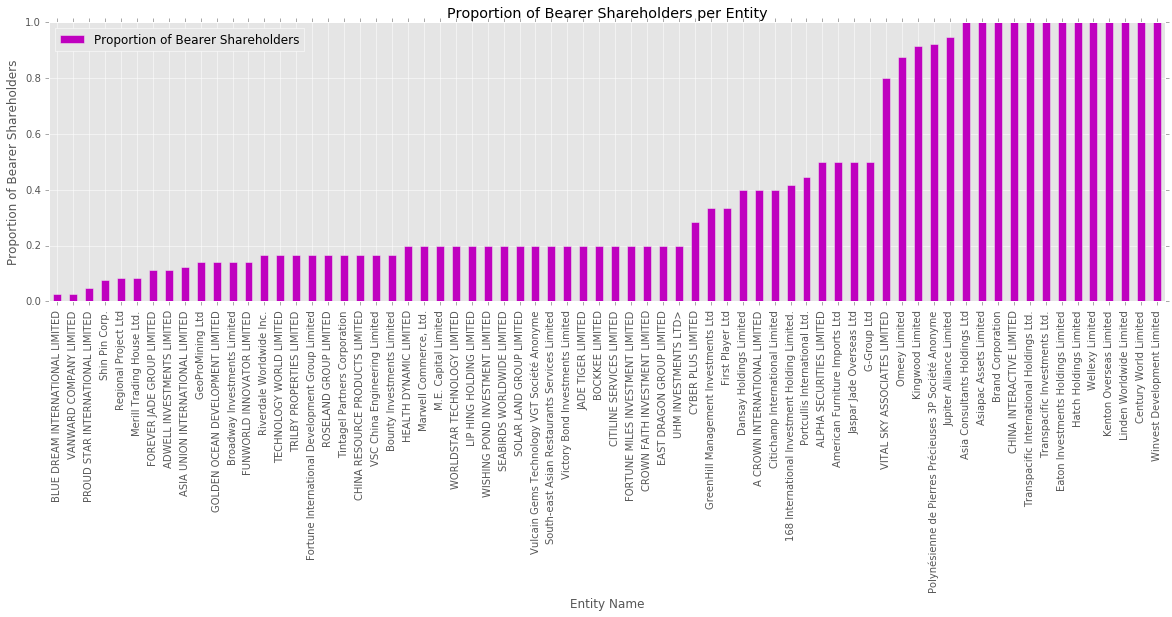

In [9]:
entity_numShareHolders_bearer_proportions = entity_by_shareholder.merge(numBearers_per_Entity, on = 'name')
#entity_numShareHolders_bearer_proportion = entity_numShareHolders_bearer_proportions.pivot_table(index = 'name', )
entity_numShareHolders_bearer_proportions['Proportion of Bearer Shareholders']\
    = entity_numShareHolders_bearer_proportions['Bearer Shareholders']/entity_numShareHolders_bearer_proportions['Number of shareholders']
    
#filter dataframe by rows with 55 or more shareholders
entity_numShareHolders_bearer_proportions = entity_numShareHolders_bearer_proportions\
    .ix[entity_numShareHolders_bearer_proportions['Number of shareholders'] >= 5, :].sort_values(by = 'Proportion of Bearer Shareholders',ascending = True)

plt.figure()

entity_numShareHolders_bearer_proportions.plot.bar(x='name', y= 'Proportion of Bearer Shareholders',figsize = (20,5), color = 'm')
plt.ylabel('Proportion of Bearer Shareholders')
plt.xlabel('Entity Name')
plt.legend(['Proportion of Bearer Shareholders'], loc = 2)
plt.title("Proportion of Bearer Shareholders per Entity")


Keep in mind that only entities with bearer shareholders are shown here. There are actually many active entities with no bearer shareholders. The true owner of the shares have done an excellent job at hiding their true identities.

a) How many directors did each entity hire to represent it? (Can assume other entities with no directors didn't hire any; only entities with directors are shown)

In [10]:
directors_link = all_edges_data.ix[all_edges_data['rel_type'] == 'Director of',:]
directors_link.rename(columns = {'node_2':'node_id'}, inplace = True)
directors_entity_merged = directors_link.merge(entities_data, on = 'node_id')

entity_by_numDirectors = directors_entity_merged.groupby('name')['node_1'].count().to_frame()
entity_by_numDirectors.rename(columns = {'node_1': 'Number of Directors'}, inplace = True)
entity_by_numDirectors = entity_by_numDirectors.sort_values(by = 'Number of Directors',ascending = True)
entity_by_numDirectors

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Number of Directors
name,
"""Always Open"" Trade House, Inc.",1
MULTI-LINES INVESTMENT LIMITED,1
MULTI-LINKS TECHNOLOGIES LIMITED,1
MULTI-MISSIONS CONSULTANTS INC.,1
MULTI-PROFIT TECHNOLOGY LIMITED,1
MULTI-PROGRAM INC.,1
MULTI-REACH INVESTMENTS LIMITED,1
...,...
PUSHKIN ENTERPRISES LTD.,30


b) List only the entities with no beneficial owners (no true owners), but have nominee director(s) in charge.

In [11]:
#node_2: 10024554 is one known such case

beneficial_owners_only = all_edges_data.ix[all_edges_data['rel_type']== 'Beneficial Owner of' ,:]
directors_only =  all_edges_data.ix[all_edges_data['rel_type']== 'Director of',:]  

beneficial_owners_and_directors_only_dflist = [beneficial_owners_only,directors_only]
beneficial_owners_and_directors_only = pd.concat(beneficial_owners_and_directors_only_dflist)

beneficial_owners_and_directors_only['Does Entity Have Known Beneficial Owner?'] = beneficial_owners_and_directors_only['node_2'].duplicated(keep = False)
#set keep = False to mark all duplicates as true

#beneficial_owners_and_directors_only.ix[beneficial_owners_and_directors_only['node_2'] == 10024554,:]
#beneficial_owners_and_directors_only

#filter to only get entities with no known beneficial owner
beneficial_owners_and_directors_only = beneficial_owners_and_directors_only.ix[beneficial_owners_and_directors_only['Does Entity Have Known Beneficial Owner?']\
        == False, :    ]



# we only care about entities with directors only
directors_only = beneficial_owners_and_directors_only.ix[beneficial_owners_and_directors_only['rel_type'] == 'Director of',:]
directors_only.rename(columns = {'node_2': 'node_id'}, inplace = True)

entities_with_no_known_true_owner = directors_only.merge(entities_data, on = 'node_id')
list(entities_with_no_known_true_owner['name'])

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


['PCJ International Venture Limited',
 'JAY MARRIOT INTERNATIONAL LTD.',
 'EXCELLE MEDIA INTERNATIONAL LTD.',
 'MAYER & COLLINS TRADING COMPANY LTD.',
 'DELANTERA FINANCIERA S.A.',
 'KERATSU HOLDING LIMITED',
 'TREI INVESTMENTS CORP.',
 'FORDIANT LTD.',
 'BLAIRMORE HOLDINGS, INC.',
 'STARFLIGHT VENTURES LIMITED',
 'STACEY INVESTMENT HOLDINGS LTD.',
 'ARAB PALESTINIAN INVESTMENT (HOLDING) COMPANY LTD.',
 'FLEG TRADING LTD',
 'NEDSTAR COMMERCIAL LIMITED',
 'NEWINGTON GROUP TRADING LIMITED',
 'MADRIGAL FINANCE CORP.',
 'IVORY COAST HOLDINGS LIMITED',
 '4M GLOBAL INVEST LTD',
 'ACE CLEVER LIMITED',
 'EAGLE VAST GROUP LIMITED',
 'EVERJET WORLDWIDE LIMITED',
 "SUN'S TREASURE TRADING LIMITED",
 'FAIRY WINNER LIMITED',
 'GOAL INTERNATIONAL LIMITED',
 'MBB Sukuk Inc.',
 'GLORY RISE GROUP HOLDINGS LIMITED',
 'LionGate Management Ltd',
 'VCANGEL INVESTMENT CO., LTD.',
 'Y.L.Y. INTERNATIONAL CORPORATION',
 'Dream City Productions Limited',
 'Billion Sea Investment Limited',
 'Condor Holdings Group

What proportion of Mossack Fonseca's (an Offshore Service Provider that manages offshore entities for a client) entities are still active as of 2015 ?

In [12]:
active_only = entities_data.ix[entities_data['status'] == 'Active' ,:]

Fonseca_active_only = active_only.ix[active_only['service_provider'] == 'Mossack Fonseca']
Fonseca_only = entities_data.ix[entities_data['service_provider'] == 'Mossack Fonseca', :]
Fonseca_prop_active = Fonseca_active_only['status'].count()/Fonseca_only['status'].count() * 100

Portcullis_Trustnet_active_only = active_only.ix[active_only['service_provider'] == 'Portcullis Trustnet']
Portcullis_Trustnet_only = entities_data.ix[entities_data['service_provider'] == 'Portcullis Trustnet', :]
Portcullis_Trustnet_prop_active = Portcullis_Trustnet_active_only['status'].count()/Portcullis_Trustnet_only['status'].count() * 100

Commonwealth_Trust_Limited_active_only = active_only.ix[active_only['service_provider'] == 'Commonwealth Trust Limited']
Commonwealth_Trust_Limited_only = entities_data.ix[entities_data['service_provider'] == 'Commonwealth Trust Limited', :]
Commonwealth_Trust_Limited_prop_active = Commonwealth_Trust_Limited_active_only['status'].count()/Commonwealth_Trust_Limited_only['status'].count() * 100


print(str(Fonseca_prop_active) + " % of Mossack Fonseca's entities \
are still active.")

print(str(Portcullis_Trustnet_prop_active) + " % of Portcullis Trustnet's entities \
are still active.")

print(str(Commonwealth_Trust_Limited_prop_active) + " % of Commonwealth Trust Limited's entities \
are still active.")


26.0861017362 % of Mossack Fonseca's entities are still active.
55.2726440465 % of Portcullis Trustnet's entities are still active.
38.6522568341 % of Commonwealth Trust Limited's entities are still active.


Locations of Mossack Fonseca's active entities:

In [13]:
# #plotting all the countries Mossack Fonseca's active offshore entities located would require way too many manual name inputs
# #since countries used in this dataset vary from other datasets containing the lattitudes and longitudes of each country.

# from mpl_toolkits.basemap import Basemap

# import matplotlib.pyplot as plt

# # llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# # are the lat/lon values of the lower left and upper right corners
# # of the map.
# # lat_ts is the latitude of true scale.
# # resolution = 'c' means use crude resolution coastlines.
# map = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# map.drawcoastlines()
# #map.drawcountries()
# map.fillcontinents(color='white',lake_color='aqua')

# map.drawmapboundary(fill_color='aqua')

# plt.title("Mossack Fonseca's Active Offshore Entities")


# lats = [22.396428, 23.69781, 46.818188, 4.570868]
# lons = [114.109497,120.960515, 8.227512, -74.297333]

# x, y = map(lons, lats)

# map.scatter(x, y, marker='s',color='m')
# plt.show()

Fonseca_active_only['countries'].unique()

array(['Hong Kong', 'Taiwan, Province of China', 'Switzerland', 'Colombia',
       'China', 'Seychelles', 'Singapore', 'Jersey', 'Andorra', 'Guernsey',
       'Cyprus', 'United Arab Emirates', 'United Kingdom', 'Panama',
       'Isle of Man', 'Samoa', 'Guatemala', 'United States', 'Ecuador',
       'Lebanon', 'Czech Republic', 'Netherlands', 'Brazil', 'Ireland',
       'Hungary', 'Bahamas', 'Monaco', 'Thailand', 'Luxembourg',
       'Costa Rica', 'Israel', 'Belize', 'Spain', 'Gibraltar',
       'Dominican Republic', 'Liechtenstein', 'France',
       'Russian Federation', 'Malta', 'Uruguay', 'Canada', 'Saudi Arabia',
       'Qatar', "Côte d'Ivoire", 'El Salvador', 'Greece',
       'Saint Kitts and Nevis', 'Portugal', 'American Samoa', 'Chile', nan,
       'Jordan', 'Sweden', 'Venezuela, Bolivarian Republic of', 'Bermuda',
       'Peru', 'Indonesia', 'Kuwait', 'Australia', 'Haiti', 'Argentina',
       'South Africa', 'Slovenia', 'Anguilla', 'Paraguay', 'Mauritius',
       'Aruba', 'Eston